In [3]:
import pandas as pd
import numpy as np

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
df=pd.read_csv("hitters.csv")
pd.set_option('display.max_columns', 120)

In [5]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [6]:
df.isnull().sum() #bağımlı değişkenimde boş değer olduğu için doldurmak yerine veri setinden silmeyi tercih ediyorum.

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
df.dropna(inplace=True,axis=0)
df=df.reset_index()

In [8]:
df.isnull().sum()

index        0
AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [9]:
#df.drop("index",inplace=True)

In [10]:
cat_col=[i for i in df.columns if df[i].dtypes=="O"]
cat_col

['League', 'Division', 'NewLeague']

In [11]:
#df.drop('index',axis=1,inplace=True)
#df.reset_index()
#del df["index"]

In [12]:
df

,index,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [13]:
df=df.drop("index",axis=1)

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
categorical_data=df[cat_col]
categorical_data

,League,Division,NewLeague
0,N,W,N
1,A,W,A
2,N,E,N
3,N,E,N
4,A,W,A
...,...,...,...
258,N,E,N
259,A,E,A
260,A,W,A
261,A,E,A


In [16]:
"""df.loc[(df["Years"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["Years"] > 2) & (df['Years'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["Years"] > 5) & (df['Years'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["Years"] > 10), "NEW_YEARS_LEVEL"] = "Expert"
df["NEW_C_RUNS_RATIO"] = df["Runs"] / df["CRuns"]
# CAREER BAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["AtBat"] / df["CAtBat"]
# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["Hits"] / df["CHits"]
# CAREER HMRUN RATIO
#df["NEW_C_HMRUN_RATIO"] = df["HmRun"] / df["CHmRun"]
# CAREER RBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# CAREER WALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["Walks"] / df["CWalks"]
"""

'df.loc[(df["Years"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"\ndf.loc[(df["Years"] > 2) & (df[\'Years\'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"\ndf.loc[(df["Years"] > 5) & (df[\'Years\'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"\ndf.loc[(df["Years"] > 10), "NEW_YEARS_LEVEL"] = "Expert"\ndf["NEW_C_RUNS_RATIO"] = df["Runs"] / df["CRuns"]\n# CAREER BAT RATIO\ndf["NEW_C_ATBAT_RATIO"] = df["AtBat"] / df["CAtBat"]\n# CAREER HITS RATIO\ndf["NEW_C_HITS_RATIO"] = df["Hits"] / df["CHits"]\n# CAREER HMRUN RATIO\n#df["NEW_C_HMRUN_RATIO"] = df["HmRun"] / df["CHmRun"]\n# CAREER RBI RATIO\ndf["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]\n# CAREER WALKS RATIO\ndf["NEW_C_WALKS_RATIO"] = df["Walks"] / df["CWalks"]\n'

In [17]:
cat_col=[i for i in df.columns if df[i].dtypes=="O"]
cat_col
categorical_data=df[cat_col]
#categorical_data.reset_index()

In [18]:

# Kategorik verileri dönüştür
encoder = OneHotEncoder(drop='first')

# Kategorik verileri dönüştürün
encoded_data = encoder.fit_transform(categorical_data)

# One-hot encoded veriyi bir DataFrame'e dönüştür
encoded_data = pd.DataFrame(encoded_data.toarray(),columns=["LEAGUE_N", "DIVISION_W", "NEW_LEAGUE_N"])
encoded_data

,LEAGUE_N,DIVISION_W,NEW_LEAGUE_N
0,1.0,1.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
258,1.0,0.0,1.0
259,0.0,0.0,0.0
260,0.0,1.0,0.0
261,0.0,0.0,0.0


In [19]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [20]:
encoder.categories_

[array(['A', 'N'], dtype=object),
 array(['E', 'W'], dtype=object),
 array(['A', 'N'], dtype=object)]

In [21]:
df=pd.concat([encoded_data,df],axis=1)

In [81]:
df

,LEAGUE_N,DIVISION_W,NEW_LEAGUE_N,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,1.0,1.0,1.0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,0.0,1.0,0.0,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,1.0,0.0,1.0,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,1.0,0.0,1.0,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,0.0,1.0,0.0,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1.0,0.0,1.0,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,0.0,0.0,0.0,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,0.0,1.0,0.0,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,0.0,0.0,0.0,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [82]:
df.drop(["NewLeague","Division","League"],axis=1,inplace=True)

In [83]:
#df=pd.concat([encoded_data,df],axis=1)

In [84]:
df.isnull().sum()

LEAGUE_N        0
DIVISION_W      0
NEW_LEAGUE_N    0
AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary          0
dtype: int64

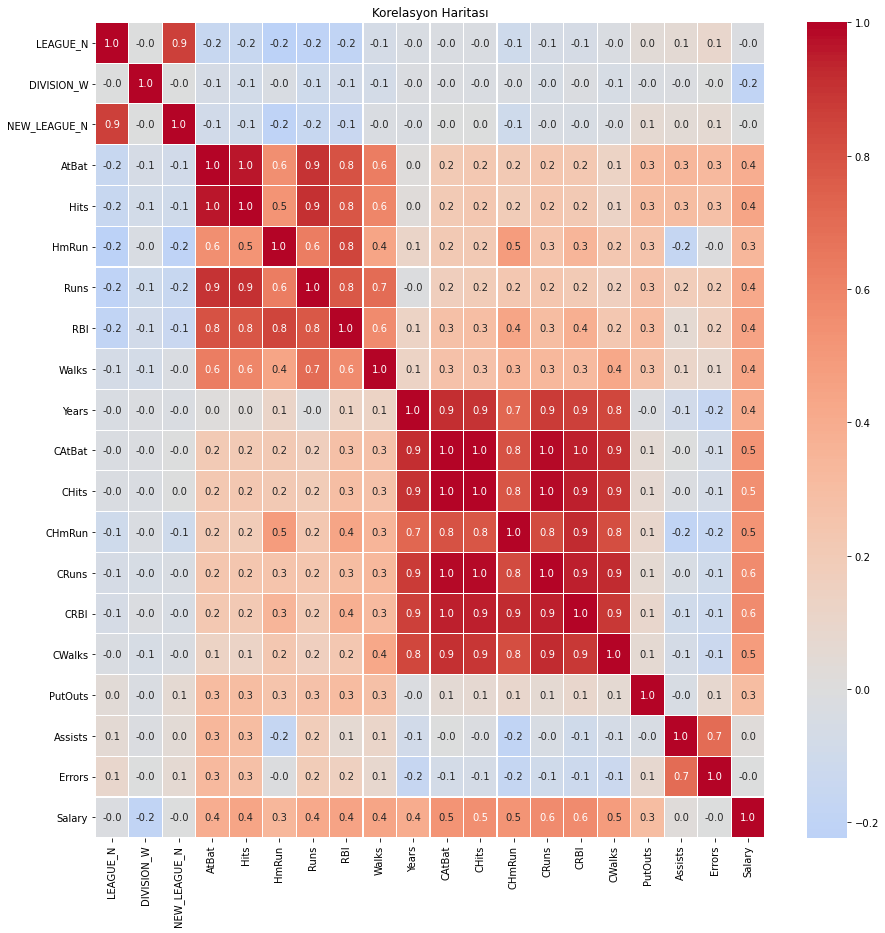

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".1f", linewidths=0.1)
plt.title("Korelasyon Haritası")
plt.show()

In [86]:
#AtBat değişkeni Hits ile 1.0 korelasyonu olduğu için AtBat değşikenini,Chits ve CatBat değişkenleri arasındaki yüksek korelasyondan dolayı da Chits değişkenini siliyorum veri setinden siliyorum
df.drop(["CAtBat","CHits","Runs","Hits","CRuns","CRBI","CWalks"],axis=1,inplace=True)

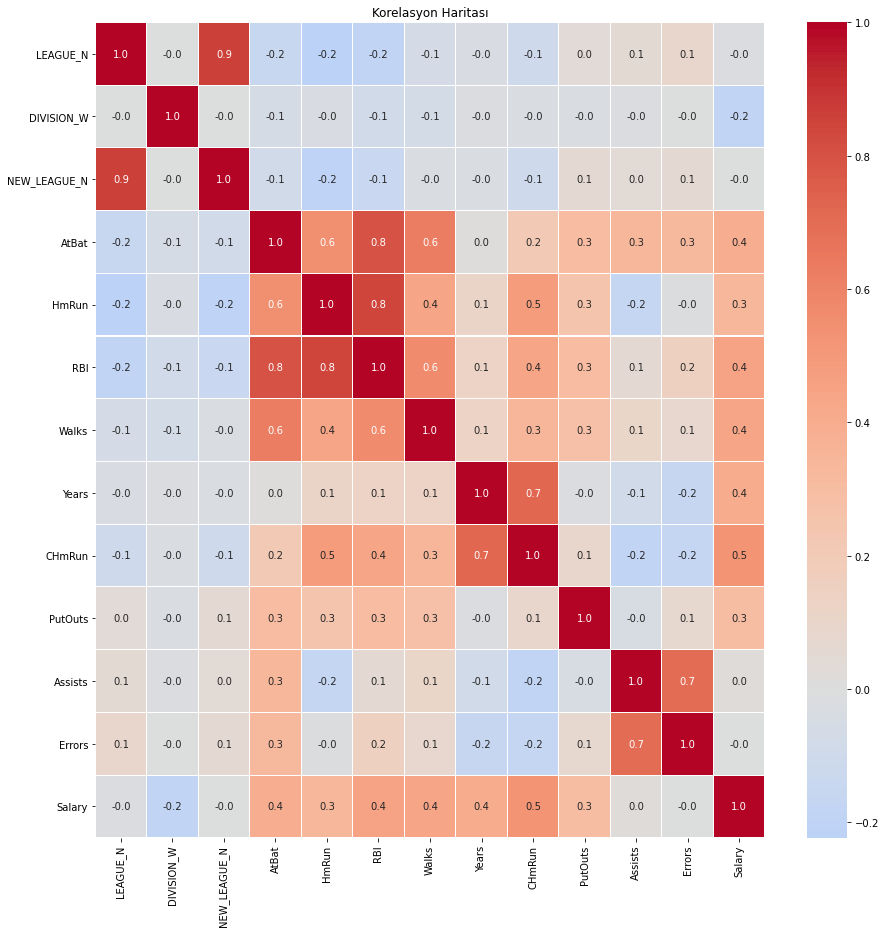

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".1f", linewidths=0.1)
plt.title("Korelasyon Haritası")
plt.show()

In [30]:
verinum=[i for i in df if df[i].dtype =='int64']
corr=df[verinum].corr()
print(corr)

Empty DataFrame
Columns: []
Index: []


In [95]:
df.drop(["LEAGUE_N"],axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
binary_col=[i for i in df.columns if df[i].dtype not in [float,int] and df[i].nunique()==2]


In [88]:
df.isnull().sum()

LEAGUE_N        0
DIVISION_W      0
NEW_LEAGUE_N    0
AtBat           0
HmRun           0
RBI             0
Walks           0
Years           0
CHmRun          0
PutOuts         0
Assists         0
Errors          0
Salary          0
dtype: int64

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
######################################################
X = df.drop("Salary", axis=1)
y = df[["Salary"]]
y
X
##########################
# Model
##########################

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
# b + w*x
# sabit (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_

#linear regression y_hat = b + w*x
np.inner(X_train.iloc[2, :].values ,reg_model.coef_) + reg_model.intercept_
y_train.iloc[2]

np.inner(X_train.iloc[4, :].values ,reg_model.coef_) + reg_model.intercept_
y_train.iloc[4]



##########################
# Tahmin
##########################


##########################
# Tahmin Başarısını Değerlendirme
##########################


# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# smape = mean_absolute_error(y_train, y_pred) / y_train.mean()


# TRAIN RKARE
reg_model.score(X_train, y_train)



# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Test RKARE
reg_model.score(X_test, y_test)


0.3333277630652475

In [93]:
'''import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion matrix hesapla
cm = confusion_matrix(y_train, y_pred)

# Görselleştir
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\n# Confusion matrix hesapla\ncm = confusion_matrix(y_train, y_pred)\n\n# Görselleştir\nplt.figure(figsize=(6, 6))\nsns.heatmap(cm, annot=True, cmap='Blues', fmt='d')\nplt.xlabel('Tahmin Edilen')\nplt.ylabel('Gerçek')\nplt.show()"